# Principal Component Analysis with Cancer Data

In [347]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [348]:
ls

R5_Internal_Lab_PCA_PBRS.ipynb    jokes.csv
breast-cancer-wisconsin-data.csv


In [349]:
cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv')
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [350]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [351]:
cancer_df.shape

(699, 11)

In [352]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [353]:
cancer_df[cancer_df['Bare Nuclei'] == '?']['Bare Nuclei']

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: Bare Nuclei, dtype: object

In [354]:
#convert object to int64
cancer_df['Bare Nuclei'].replace('?',np.nan,inplace=True)

In [355]:
cancer_df['Bare Nuclei'] = pd.to_numeric(cancer_df['Bare Nuclei'])
cancer_df['Bare Nuclei'].fillna(cancer_df['Bare Nuclei'].mean(),inplace=True)

In [356]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [357]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.544656e+00,3.601852,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [358]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [359]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [360]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer_df.duplicated().value_counts()

False    691
True       8
dtype: int64

There are 8 duplicate rows. Let's drop them

In [361]:
cancer_df.drop_duplicates(keep='first',inplace=True)
cancer_df.drop(columns='ID',inplace=True)

In [362]:
cancer_df.shape

(691, 10)

In [363]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,691.0,4.426918,2.815861,1.0,2.0,4.0,6.0,10.0
Cell Size,691.0,3.130246,3.041328,1.0,1.0,1.0,5.0,10.0
Cell Shape,691.0,3.201158,2.959886,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,691.0,2.824891,2.866552,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,691.0,3.211288,2.199852,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,691.0,3.537937,3.595445,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,691.0,3.435601,2.442345,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,691.0,2.882779,3.066298,1.0,1.0,1.0,4.0,10.0
Mitoses,691.0,1.593343,1.723129,1.0,1.0,1.0,1.0,10.0
Class,691.0,2.688857,0.951051,2.0,2.0,2.0,4.0,4.0


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [364]:
# Check for correlation of variable
cancer_df.corr().style.background_gradient().set_precision(2)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1,0.64,0.65,0.49,0.52,0.59,0.56,0.54,0.35,0.72
Cell Size,0.64,1,0.91,0.71,0.75,0.68,0.76,0.73,0.46,0.82
Cell Shape,0.65,0.91,1,0.69,0.71,0.71,0.74,0.72,0.44,0.82
Marginal Adhesion,0.49,0.71,0.69,1,0.61,0.67,0.67,0.6,0.42,0.7
Single Epithelial Cell Size,0.52,0.75,0.71,0.61,1,0.58,0.62,0.63,0.48,0.68
Bare Nuclei,0.59,0.68,0.71,0.67,0.58,1,0.67,0.58,0.34,0.81
Normal Nucleoli,0.56,0.76,0.74,0.67,0.62,0.67,1,0.67,0.34,0.76
Bland Chromatin,0.54,0.73,0.72,0.6,0.63,0.58,0.67,1,0.43,0.72
Mitoses,0.35,0.46,0.44,0.42,0.48,0.34,0.34,0.43,1,0.42
Class,0.72,0.82,0.82,0.7,0.68,0.81,0.76,0.72,0.42,1


In [365]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

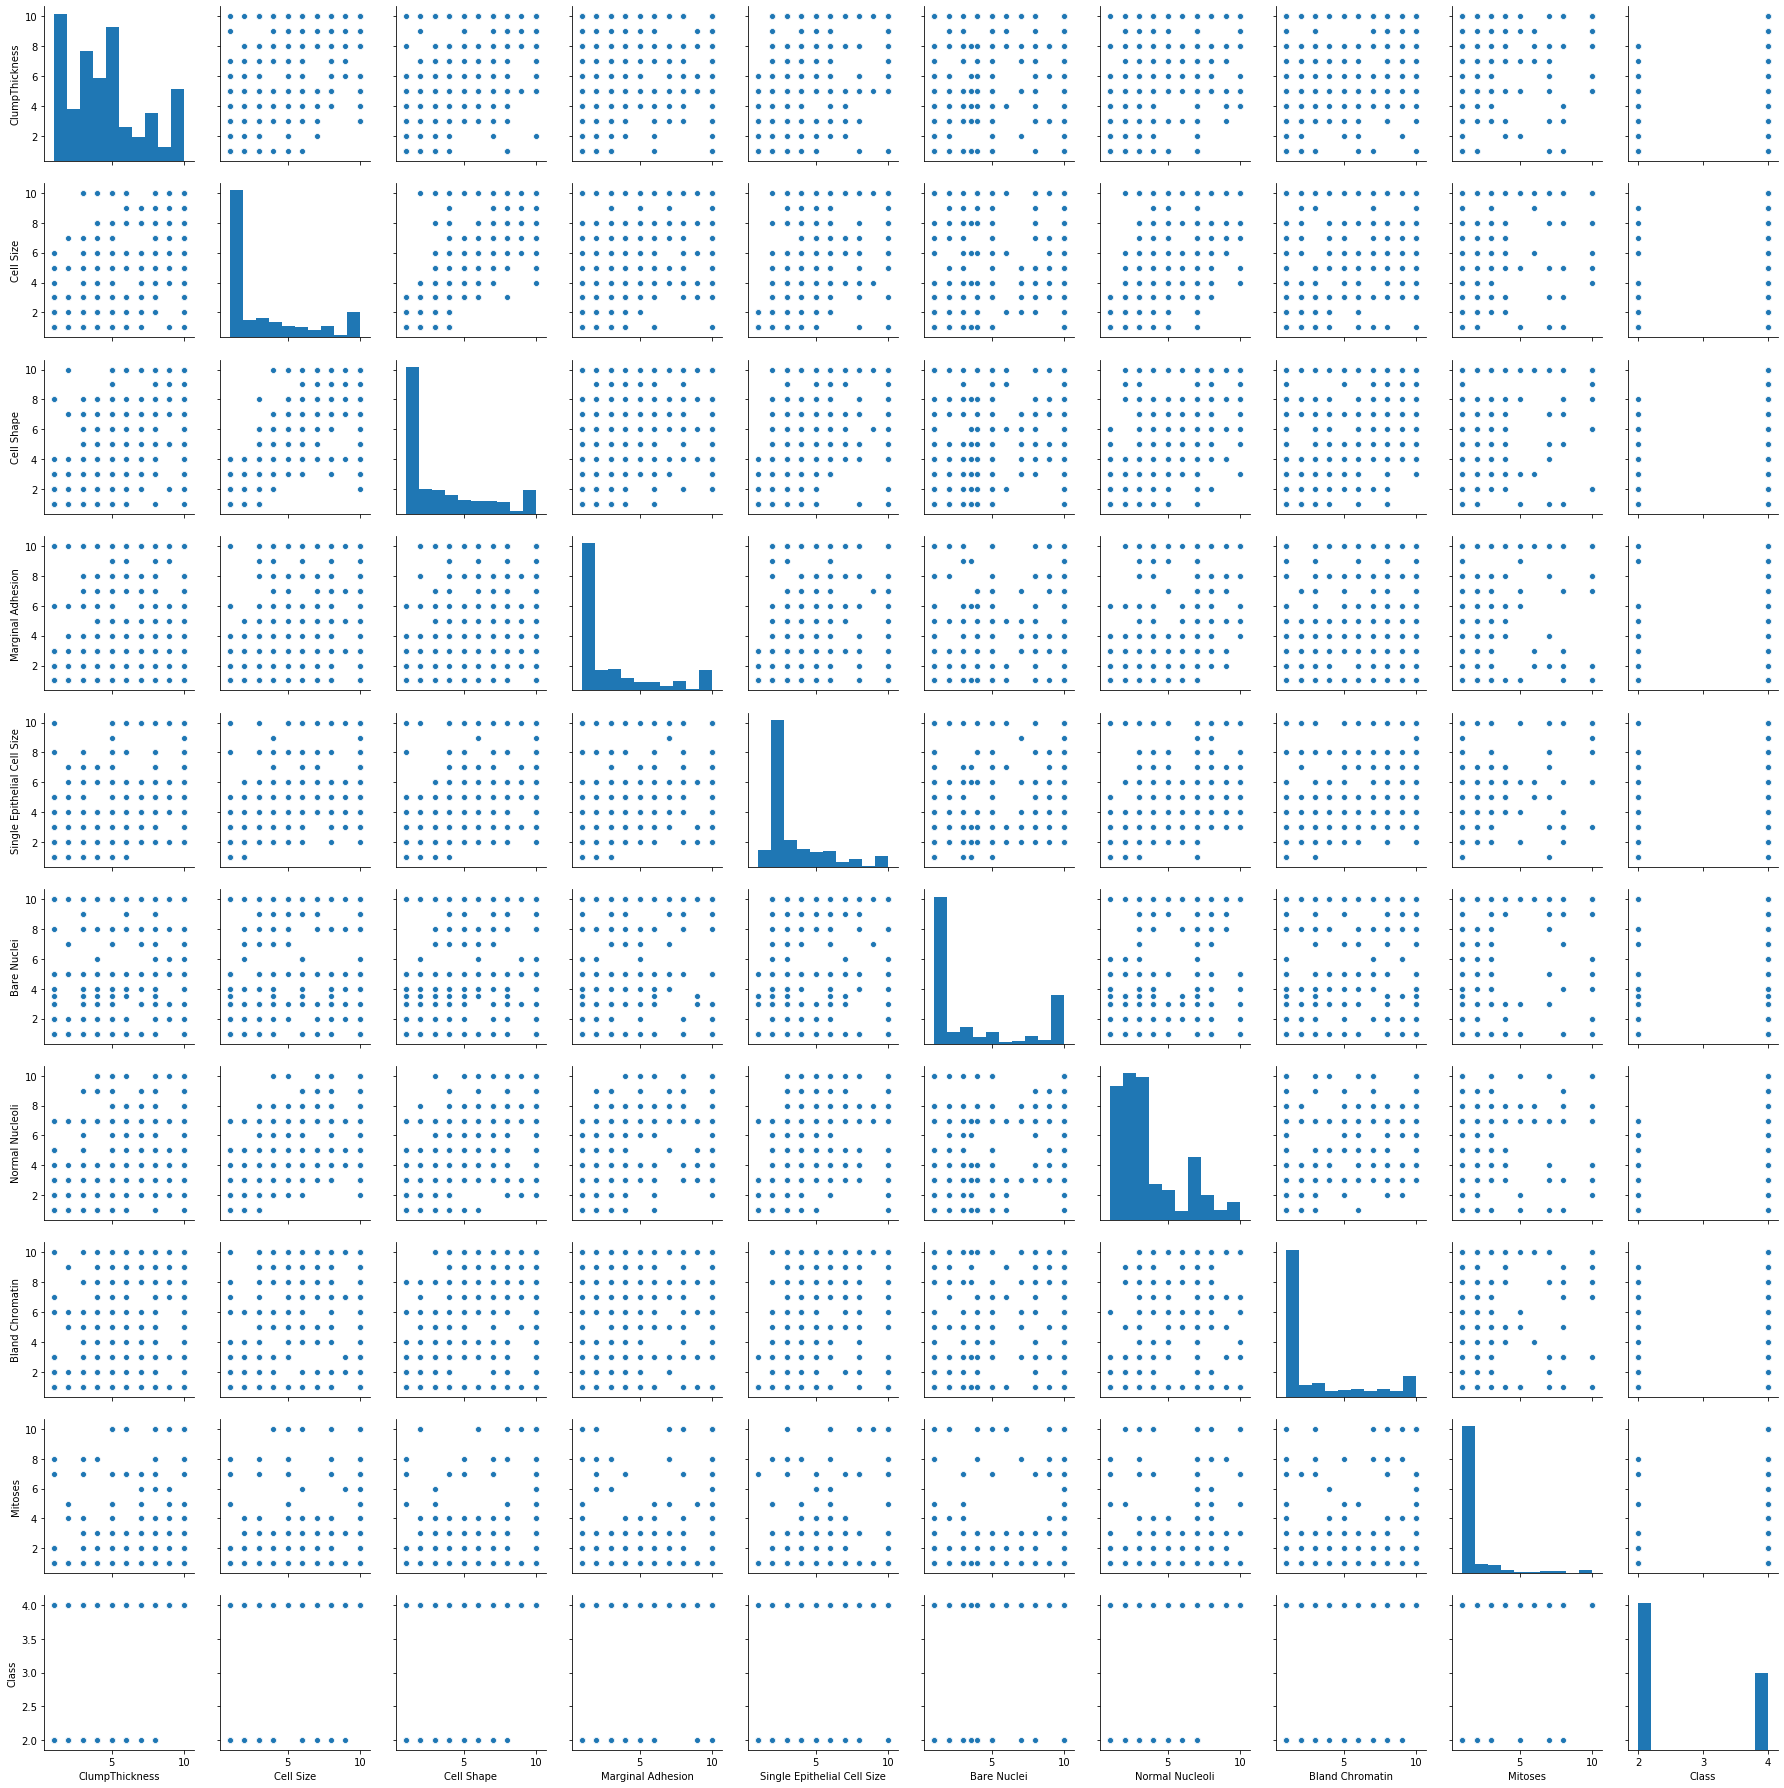

In [366]:
#Let us check for pair plots
sns.pairplot(cancer_df)

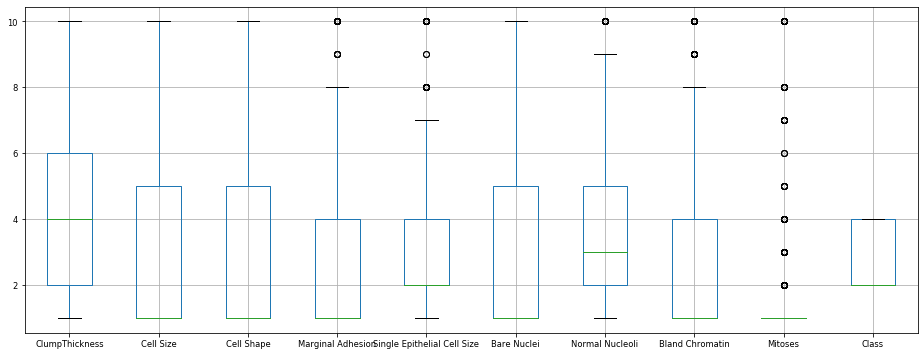

In [367]:
cancer_df.boxplot(fontsize='small',figsize=(16,6))

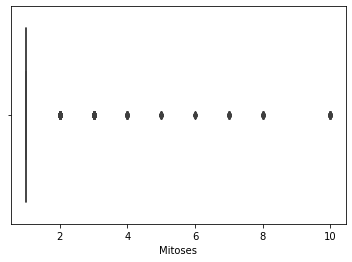

In [368]:
sns.boxplot(cancer_df['Mitoses'])

In [369]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [370]:
# We could see most of the outliers are now removed.

In [371]:
pd.crosstab(cancer_df['Bland Chromatin'],cancer_df['Class'])

Class,2,4
Bland Chromatin,,
1,397,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [372]:
#Replace the higher outliers with q3
for col in cancer_df.columns:
    q3 = cancer_df[col].quantile(0.75)
    q1 = cancer_df[col].quantile(0.25)
    max_val = q3 + 1.5*(q3-q1)
    cancer_df[col]=np.where(cancer_df[col]>max_val,q3,cancer_df[col])

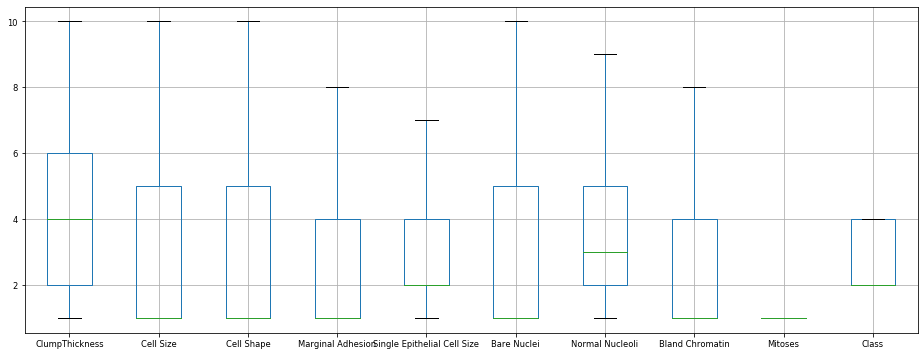

In [373]:
cancer_df.boxplot(fontsize='small',figsize=(16,6))

# Q6 Create a covariance matrix for identifying Principal components

In [374]:
# PCA
# Step 1 - Create covariance matrix
X = cancer_df.values
X_std = StandardScaler().fit_transform(X)
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00144928 0.64427196 0.65469961 0.49303803 0.53423144 0.58888683
  0.56549929 0.51600742 0.         0.7179775 ]
 [0.64427196 1.00144928 0.90673173 0.69334195 0.73760001 0.68589838
  0.72263552 0.65762527 0.         0.81890491]
 [0.65469961 0.90673173 1.00144928 0.66132372 0.71447771 0.70756057
  0.70382932 0.63973996 0.         0.8188784 ]
 [0.49303803 0.69334195 0.66132372 1.00144928 0.64424807 0.64635137
  0.66024086 0.58319823 0.         0.69557547]
 [0.53423144 0.73760001 0.71447771 0.64424807 1.00144928 0.6215214
  0.62846999 0.62033825 0.         0.71520828]
 [0.58888683 0.68589838 0.70756057 0.64635137 0.6215214  1.00144928
  0.68599401 0.59192799 0.         0.81498883]
 [0.56549929 0.72263552 0.70382932 0.66024086 0.62846999 0.68599401
  1.00144928 0.61881441 0.         0.75603489]
 [0.51600742 0.65762527 0.63973996 0.58319823 0.62033825 0.59192799
  0.61881441 1.00144928 0.         0.67913078]
 [0.         0.         0.         0.         0.         0.

# Q7 Identify eigen values and eigen vector

In [375]:
# Step 2- Get eigen values and eigen vector

In [376]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [377]:
eig_vals

array([6.39660591, 0.5559485 , 0.09054364, 0.13318734, 0.4447705 ,
       0.42244947, 0.29753664, 0.34335803, 0.32864345, 0.        ])

In [378]:
eig_vecs

array([[ 0.29662928,  0.7856211 ,  0.02210606,  0.1760693 ,  0.13076331,
        -0.0659179 ,  0.15773554,  0.46310392,  0.05031423,  0.        ],
       [ 0.36025553,  0.01304755,  0.73000652,  0.04752059,  0.09090108,
         0.37766865, -0.27880326, -0.20984757,  0.24942757,  0.        ],
       [ 0.35722491,  0.09236326, -0.66753503,  0.19639473,  0.0642889 ,
         0.36238423, -0.35394183, -0.29392458,  0.18045391,  0.        ],
       [ 0.31676954, -0.43066558, -0.05341557,  0.0127488 , -0.38043867,
         0.03349284, -0.23224464,  0.70173577,  0.13763156,  0.        ],
       [ 0.32455136, -0.26550248, -0.03240145,  0.04557047,  0.25743674,
         0.46320353,  0.55676862,  0.08171509, -0.47280915,  0.        ],
       [ 0.3316625 ,  0.05925719,  0.10677087,  0.36571654, -0.43397126,
        -0.34564929, -0.1548199 , -0.26788711, -0.58120803,  0.        ],
       [ 0.33136808, -0.11784667, -0.03308612,  0.08600783, -0.26553218,
        -0.2685603 ,  0.59329145, -0.26840145

# Q8 Find variance and cumulative variance by each eigen vector

In [379]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance", cum_var_exp)

Cumulative Variance [ 70.97054318  77.13880919  82.07355183  86.76064193  90.57021
  94.21651942  97.51769773  98.99541545 100.         100.        ]


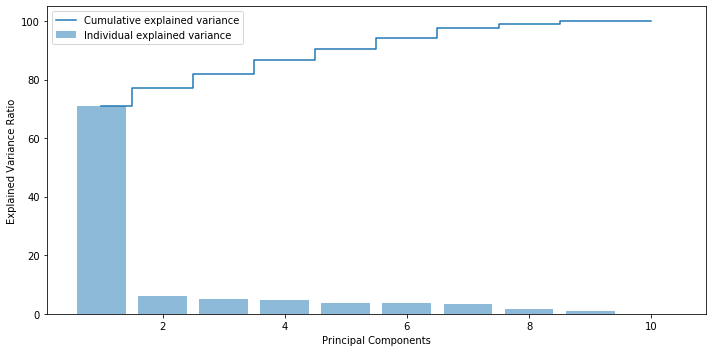

In [380]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

based on the chart, n_components should be 7

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [381]:
X = cancer_df.drop(columns='Class')  # we only take the first two features.
y = cancer_df['Class']
X_centered = X - X.mean(axis=0)
pca = PCA(n_components=7)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [382]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.347721,0.450866,0.438990,0.238993,0.176127,0.507419,0.289118,0.232155,-0.0
1,0.344171,0.359141,0.301974,-0.046510,0.053304,-0.808318,-0.038830,0.038537,-0.0
2,0.864536,-0.316109,-0.240195,-0.191939,-0.107877,0.142067,-0.116425,-0.112884,-0.0
3,0.073434,-0.236530,-0.406933,0.363867,0.095528,-0.235902,0.484372,0.584188,-0.0
4,-0.041721,-0.009940,0.069485,-0.322267,0.061715,0.089180,-0.566633,0.746084,-0.0


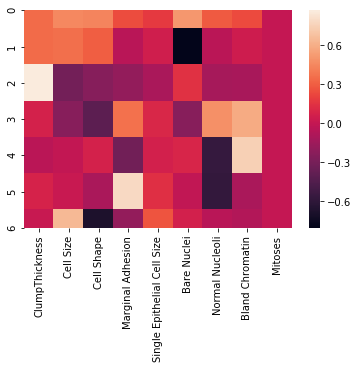

In [383]:
sns.heatmap(df_comp)

# Q10 Find correlation between components and features

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [384]:
ls

R5_Internal_Lab_PCA_PBRS.ipynb    jokes.csv
breast-cancer-wisconsin-data.csv


In [385]:
jokes_df = pd.read_csv('jokes.csv')
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [386]:
jokes_df.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [387]:
ratings = jokes_df.head(200).copy()
ratings.shape

(200, 101)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [388]:
ratings.replace(99,0,inplace=True)

In [389]:
ratings.describe()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,70.110000,0.530050,0.593900,0.237650,-0.701000,-0.037900,1.320050,0.171500,-0.085300,0.016700,...,0.56260,0.175100,1.155850,0.637900,0.581650,0.417550,0.755000,0.093700,0.135000,0.524400
std,21.845688,4.507771,4.915306,4.471239,3.863859,5.433866,4.393323,5.627576,4.861652,4.037797,...,2.93055,3.172647,3.199264,3.474739,3.314584,2.981439,3.243612,3.497441,3.265586,3.266252
min,36.000000,-9.710000,-9.950000,-9.710000,-9.760000,-9.810000,-9.850000,-9.950000,-9.850000,-9.850000,...,-9.13000,-9.610000,-9.710000,-9.560000,-9.760000,-9.510000,-9.130000,-9.660000,-9.760000,-9.560000
25%,51.000000,-0.852500,-2.595000,-0.727500,-1.685000,-4.220000,0.000000,-4.480000,-4.270000,-0.452500,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,0.000000,0.000000,0.000000,0.000000,0.340000,0.000000,0.850000,0.680000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,3.412500,4.535000,2.330000,0.000000,4.232500,4.937500,4.685000,3.425000,1.335000,...,0.00000,0.000000,1.612500,0.190000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000
max,100.000000,9.270000,9.270000,9.270000,8.830000,9.220000,9.270000,9.270000,9.270000,9.030000,...,9.08000,9.080000,9.170000,9.080000,9.130000,9.220000,9.170000,9.220000,8.980000,8.980000


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [390]:
ratings.drop(columns='NumJokes',inplace=True)
ratings.mean().sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64